<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 4: 1.1 Data cleaning, preprocessing and EDA - Stroke

> Authors: Michael King Sutanto, Eugene Matthew Cheong, Pius Yee

---
# Table of Contents ##

### Notebook 1.1 Data cleaning, preprocessing and EDA - Stroke ###

#### 1. Importing stroke dataset

[1.1 Import Libraries](#1.1-import-libraries)

[1.2 Import CSV](#1.2-import-csv)

#### 2. Cleaning 

[2.1 Removed the ID column](#2.1-removed-the-id-column)

[2.2 Checking gender](#2.2-checking-gender)

[2.3 Checking AGE min and max](#2.3-checking-age-min-and-max)

[2.4 Checking heart_disease](#2.4-checking-heart_disease)

[2.5 Checking ever_married](#2.5-checking-ever_married)

[2.6 Checking work_type](#2.6-checking-work_type)

[2.7 Checking Residence_type](#2.7-checking-residence_type)

[2.8 Checking glucose level](#2.8-checking-glucose-level)

[2.9 Checking BMI values](#2.9-checking-bmi-values)

[2.10 Checking smoking_status](#2.10-checking-smoking_status)

[2.11 Checking stroke](#2.11-checking-stroke)

[2.12 Exporting Dataset for Model selection](#2.12-exporting-dataset-for-model-selection)

#### 3. EDA 

[3.0 EDA](#3.0-eda)


---

# 1. Importing stroke dataset

##### In this notebook 1.1, we will clean the dataset for stroke before training the stroke detector model.

### 1.1 Import Libraries

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1.2 Import CSV

In [84]:
# read stroke dataset
df = pd.read_csv('../datasets/healthcare-dataset-stroke-data.csv')

In [85]:
# show data
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## 2. Cleaning

#### 2.1 Removed the ID column

In [86]:
#drop ID
df.drop(columns=df.columns[0], axis=1, inplace=True)

In [87]:
# show the data after removing ID
df.head(20)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [88]:
# show the shape
df.shape

(5110, 11)

In [89]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [90]:
# show the dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


##### Next, we have to look through the columns to see if there are any extra categories and fix missing data and NaN.

#### 2.2 Checking gender

In [91]:
# check for missing value
df['gender'].isnull().sum()

0

In [92]:
df['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

##### Dropped 'Other'

Decided to drop the 1 entry with 'Other' as gender as the dataset has plenty of data for non-stroke. It will not impact the training model much.

In [93]:
# Drop gender "other"
df = df[df['gender'] != 'Other']

In [94]:
# show the gender
df['gender'].value_counts()

gender
Female    2994
Male      2115
Name: count, dtype: int64

In [95]:
# change male to 0 and female to 1
df['gender'] = df['gender'].replace({'Male':0,'Female':1}).astype(np.uint8)

#### 2.3 Checking AGE min and max

In [96]:
# check for missing value
df['age'].isnull().sum()

0

In [97]:
# min age
df['age'].min()

0.08

In [98]:
# max age
df['age'].max()

82.0

#### Checking hypertension

In [99]:
df['hypertension'].isnull().sum()

0

In [100]:
df['hypertension'].value_counts()

hypertension
0    4611
1     498
Name: count, dtype: int64

#### 2.4 Checking heart_disease

In [101]:
# check for missing value
df['heart_disease'].isnull().sum()

0

In [102]:
df['heart_disease'].value_counts()

heart_disease
0    4833
1     276
Name: count, dtype: int64

#### 2.5 Checking ever_married

In [103]:
# check for missing value
df['ever_married'].isnull().sum()

0

In [104]:
df['ever_married'].value_counts()

ever_married
Yes    3353
No     1756
Name: count, dtype: int64

##### Converting 'Yes' and 'No' to 1 and 0 respectively. 

In [105]:
df['ever_married'] = df['ever_married'].map({"Yes":1, "No":0})

In [106]:
df['ever_married'].value_counts()

ever_married
1    3353
0    1756
Name: count, dtype: int64

#### 2.6 Checking work_type

In [107]:
# check for missing value
df['work_type'].isnull().sum()

0

In [108]:
df['work_type'].value_counts()

work_type
Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

##### Recategorizing work type to employment status

In [109]:
df.groupby('work_type')['stroke'].value_counts()

work_type      stroke
Govt_job       0          624
               1           33
Never_worked   0           22
Private        0         2775
               1          149
Self-employed  0          754
               1           65
children       0          685
               1            2
Name: count, dtype: int64

In [110]:
# create a function to recategorize the work types
def recategorize_employment(row):
    if row == "children":
        return "unemployed"
    elif row == 'Never_worked':
        return "unemployed"
    elif row == 'Private':
        return 'employed'
    elif row == 'Self-employed':
        return 'employed'
    elif row == 'Govt_job':
        return 'employed'
    else:
        return row


In [111]:
# apply the function to the column
df['employment_type'] = df['work_type'].apply(recategorize_employment)

In [112]:
# assign to new column "employment_type"
df['employment_type'] = df['employment_type'].replace({'unemployed':0,'employed':1}).astype(np.uint8)

In [113]:
# drop "work_type" column since no longer needed
df.drop('work_type', inplace=True, axis=1)

#### 2.7 Checking Residence_type

In [114]:
# check for missing value
df['Residence_type'].isnull().sum()

0

In [115]:
df['Residence_type'].value_counts()

Residence_type
Urban    2596
Rural    2513
Name: count, dtype: int64

In [116]:
# change rural to 0 and urban to 1
df['Residence_type'] = df['Residence_type'].replace({'Rural':0,'Urban':1}).astype(np.uint8)


#### 2.8 Checking glucose level

We have obtained the glucose level classification from CDC as below:

Source:
[CDC](https://www.cdc.gov/diabetes/basics/getting-tested.html)

| Result*	| A1C Test | Fasting Blood Sugar Test |	Glucose Tolerance Test |	Random Blood Sugar Test |
|--------|--------|--------|--------|--------|
Diabetes | 6.5% or above |	126 mg/dL or above | 200 mg/dL or above |	200 mg/dL or above |
Prediabetes |	5.7 – 6.4% | 100 – 125 mg/dL | 140 – 199 mg/dL | N/A |
Normal |	Below 5.7% |	99 mg/dL or below | 140 mg/dL or below |	 N/A |

In [117]:
# check for missing value
df['avg_glucose_level'].isnull().sum()

0

In [118]:
# min glucose
df['avg_glucose_level'].min()

55.12

In [119]:
# max glucose
df['avg_glucose_level'].max()

271.74

##### Create a column for diabetic_status based on CDC info

In [120]:
# define a function to categorize glucose level by CDC info
def recategorize_diabetes(row):
    if row <= 99.0:
        return "normal"
    elif row >= 99.01 and row <= 125.0:
        return "prediabetes"
    elif row >= 125.01:
        return "diabetes"

In [121]:
# apply to the column
df['diabetic_status'] = df['avg_glucose_level'].apply(recategorize_diabetes)

In [122]:
df['diabetic_status'].value_counts()

diabetic_status
normal         3071
prediabetes    1039
diabetes        999
Name: count, dtype: int64

In [123]:
# change to numerical values
df['diabetic_status'] = df['diabetic_status'].replace({'normal':0,'prediabetes':1,'diabetes':2}).astype(np.uint8)

#### 2.9 Checking BMI values

#### Adult BMI Scoring
---
| Weight | BMI Measurement |
|--------|-----------------|
| Severely underweight | BMI less than 16.5kg/m^2 |
| Underweight | BMI under 18.5 kg/m^2 |
| Normal weight | BMI greater than or equal to 18.5 to 24.9 kg/m^2 |
| Overweight | BMI greater than or equal to 25 to 29.9 kg/m^2 |
| Obesity | BMI greater than or equal to 30 kg/m^2 |
| Obesity class I | BMI 30 to 34.9 kg/m^2 |
| Obesity class II | BMI 35 to 39.9 kg/m^2 |
| Obesity class III | BMI greater than or equal to 40 kg/m^2 (also referred to as severe, extreme, or massive obesity) |

* Asian and South Asian population
    * overweight - BMI between 23 and 24.9 kg/m^2
    * obesity - BMI greater than 25 kg/m^2

In [124]:
# check for missing value
df['bmi'].isnull().sum()

201

#### Drop NaN values for BMI

In [125]:
df.dropna(subset=['bmi'], inplace=True)

201 missing bmi data

In [126]:
df['bmi'].min()

10.3

In [127]:
df['bmi'].max()

97.6

##### We further processed the obesity data by categorizing them into different groups as follows:

In [128]:
# Create a column for Obesity Status

def recategorize_obesity(row):
    if row < 18.5:
        return "underweight"
    elif row >= 18.5 and row <= 24.9:
        return "normal"
    elif row >= 25 and row <= 29.9:
        return "overweight"
    elif row >= 30 and row <= 34.9:
        return "obesity_class_1"
    elif row >= 35 and row <= 39.9:
        return "obesity_class_2"
    elif row >= 40:
        return "obesity_class_3"

In [129]:
# apply to column
df['obesity_status'] = df['bmi'].apply(recategorize_obesity)

In [130]:
df['obesity_status'].value_counts()

obesity_status
overweight         1409
normal             1242
obesity_class_1    1000
obesity_class_2     506
obesity_class_3     414
underweight         337
Name: count, dtype: int64

In [131]:
# convert to numerical values
df['obesity_status'] = df['obesity_status'].replace({'underweight': 0 ,'normal': 1 ,'overweight': 2 ,'obesity_class_1': 3 ,'obesity_class_2': 4 ,'obesity_class_3': 5})

In [132]:
df['obesity_status'].value_counts()

obesity_status
2    1409
1    1242
3    1000
4     506
5     414
0     337
Name: count, dtype: int64

#### 2.10 Checking smoking_status

In [133]:
# check for missing values
df['smoking_status'].isnull().sum()

0

In [134]:
df['smoking_status'].value_counts()

smoking_status
never smoked       1852
Unknown            1483
formerly smoked     836
smokes              737
Name: count, dtype: int64

#### 2.11 Checking stroke

In [135]:
df['stroke'].value_counts()

stroke
0    4699
1     209
Name: count, dtype: int64

In [136]:
# create a new dataframe with positive stroke data only
stroke_df = df[df['stroke'] == 1]

##### Checking "age" in stroke_df: 

##### One outlier is identified in the stroke data. Found out that a girl had a stroke at the age of 14 as below.

In [137]:
# create a new dataframe to check positive stroke data with age <18
stroke_children_df = stroke_df[stroke_df['age'] < 18]

In [138]:
# There is only one data for stroke patient below age 18.
stroke_children_df

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,employment_type,diabetic_status,obesity_status
245,1,14.0,0,0,0,0,57.93,30.9,Unknown,1,0,0,3


In [139]:
f'The outlier data is {stroke_children_df.shape[0]/stroke_df.shape[0]*100:.2f}% of the total stroke patients.'

'The outlier data is 0.48% of the total stroke patients.'

##### Since the outlier is insignificant to our population, hence no action is required as it won't affect the model.
---

##### Checking smoking status in stroke_df:

In [140]:
stroke_df['smoking_status'].value_counts()

smoking_status
never smoked       84
formerly smoked    57
smokes             39
Unknown            29
Name: count, dtype: int64

In [141]:
stroke_df['obesity_status'].value_counts()

obesity_status
2    75
3    56
1    35
4    23
5    19
0     1
Name: count, dtype: int64

##### Recategorize Smoking into 3 categories. Non-smoker, Smoker, Former Smoker.

In [142]:
# define a function to categories smoking
def recategorize_smoking(status):
    if status == "never smoked":
        return "non_smoker"
    elif status == "Unknown":
        return "non_smoker"
    elif status == "formerly smoked":
        return "former_smoker"
    else:
        return "smoker"



In [143]:
df['smoking_status'] = df['smoking_status'].apply(recategorize_smoking)

In [144]:
df['smoking_status']

0       former_smoker
2          non_smoker
3              smoker
4          non_smoker
5       former_smoker
            ...      
5104       non_smoker
5106       non_smoker
5107       non_smoker
5108    former_smoker
5109       non_smoker
Name: smoking_status, Length: 4908, dtype: object

In [145]:
df['smoking_status'].value_counts()

smoking_status
non_smoker       3335
former_smoker     836
smoker            737
Name: count, dtype: int64

In [146]:
# convert to numerical values
df['smoking_status'] = df['smoking_status'].replace({'non_smoker':0,'former_smoker':1,'smoker':2}).astype(np.uint8)

#### 2.12 Exporting Dataset for Model selection

In [147]:
df.to_csv("../datasets/healthcare-dataset-stroke-data.clean.csv", index=False)

##### We have now cleaned the dataset and ready to proceed to EDA.

# 3.0 EDA

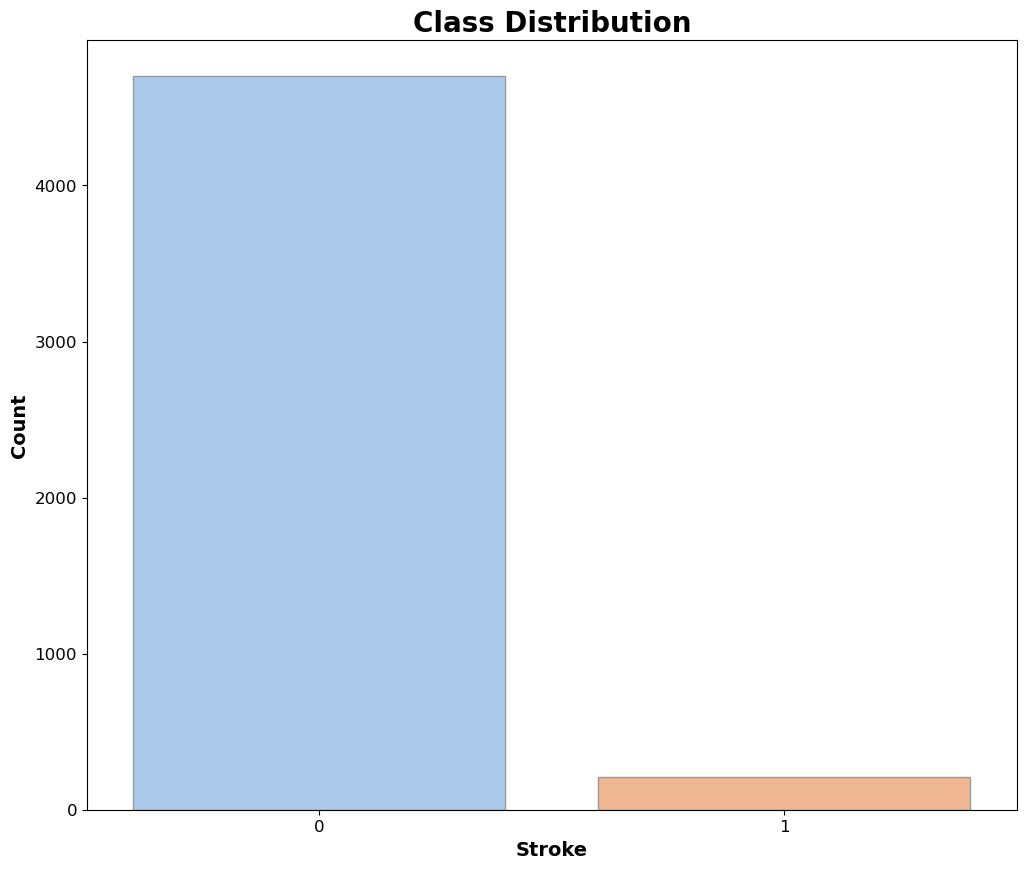

In [148]:
# plotting countplot for stroke
plt.figure(figsize=(12,10))
sns.countplot(x='stroke', data=df, palette="pastel", edgecolor=".6")
plt.title('Class Distribution', fontsize=20, weight="bold")

plt.xlabel('Stroke', fontsize=14, weight='bold')
plt.ylabel('Count', fontsize=14, weight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

##### The distribution is imbalanced. Probably have to use sampling methods to help train the model more accurately.

(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80., 90.]),
 [Text(0, 0.0, '0'),
  Text(0, 10.0, '10'),
  Text(0, 20.0, '20'),
  Text(0, 30.0, '30'),
  Text(0, 40.0, '40'),
  Text(0, 50.0, '50'),
  Text(0, 60.0, '60'),
  Text(0, 70.0, '70'),
  Text(0, 80.0, '80'),
  Text(0, 90.0, '90')])

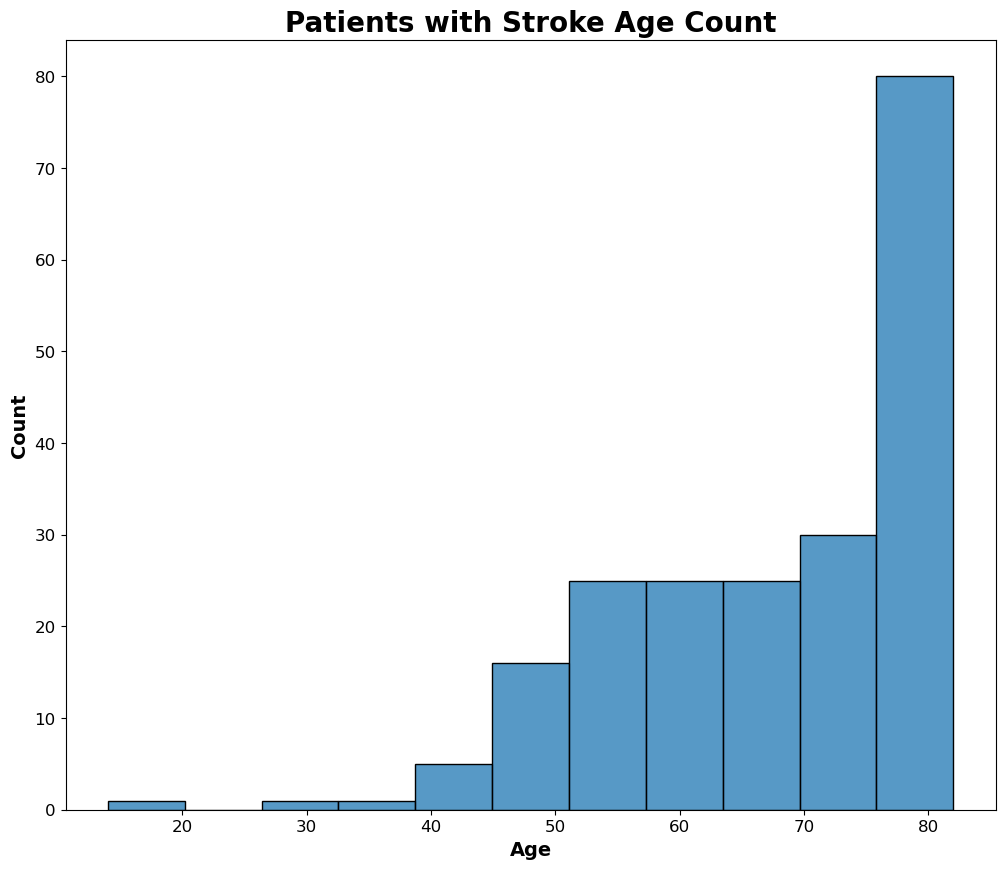

In [149]:

plt.figure(figsize=(12,10))
sns.histplot(data=stroke_df, x='age')
plt.title('Patients with Stroke Age Count', fontsize=20, weight="bold")

plt.xlabel('Age', fontsize=14, weight='bold')
plt.ylabel('Count', fontsize=14, weight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


##### People around the age of 80 have the highest incidence of stroke.

In [150]:
def recategorize_obesity(row):
    if row < 18.5:
        return "underweight"
    elif row >= 18.5 and row <= 24.9:
        return "normal"
    elif row >= 25 and row <= 29.9:
        return "overweight"
    elif row >= 30 and row <= 34.9:
        return "obesity_class_1"
    elif row >= 35 and row <= 39.9:
        return "obesity_class_2"
    elif row >= 40:
        return "obesity_class_3"
    
stroke_after70 = stroke_df[stroke_df['age'] > 70]

stroke_after70['obesity_status'] = stroke_after70['bmi'].apply(recategorize_obesity)

/var/folders/p4/69_wbmy1275g6vc8jw1vvhf00000gn/T/ipykernel_16061/2800300674.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stroke_after70['obesity_status'] = stroke_after70['bmi'].apply(recategorize_obesity)


Text(0.5, 1.0, 'Obesity Status of Stroke Patients Age above 70 Count')

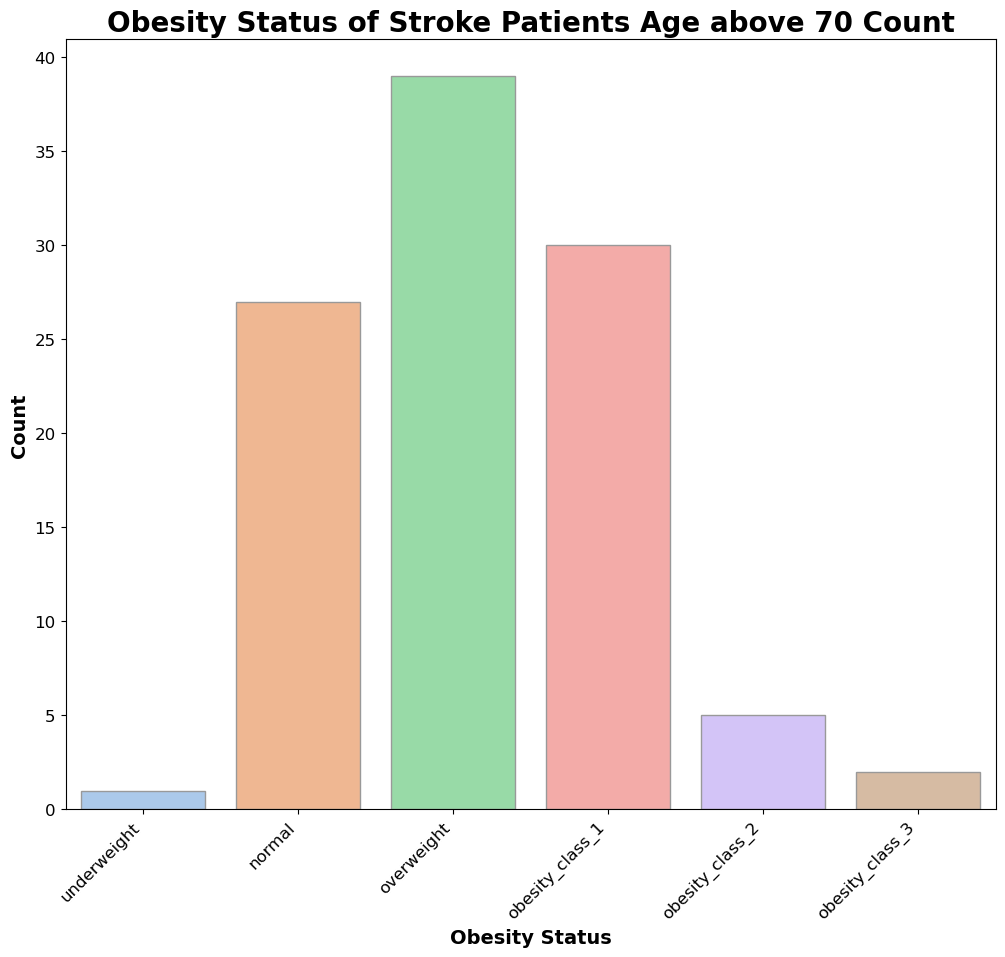

In [151]:
plt.figure(figsize=(12,10))
sns.countplot(data=stroke_after70, x='obesity_status', 
              order=['underweight','normal','overweight','obesity_class_1','obesity_class_2','obesity_class_3'], 
              palette="pastel", 
              edgecolor=".6")

plt.xlabel('Obesity Status', fontsize=14, weight='bold')
plt.ylabel('Count', fontsize=14, weight='bold')

plt.xticks(fontsize=12,rotation=45, ha='right')
plt.yticks(fontsize=12)

plt.title('Obesity Status of Stroke Patients Age above 70 Count', fontsize=20, weight="bold")


##### Majority of stroke patient with age > 70 fall in "normal" and "obesity class 1".

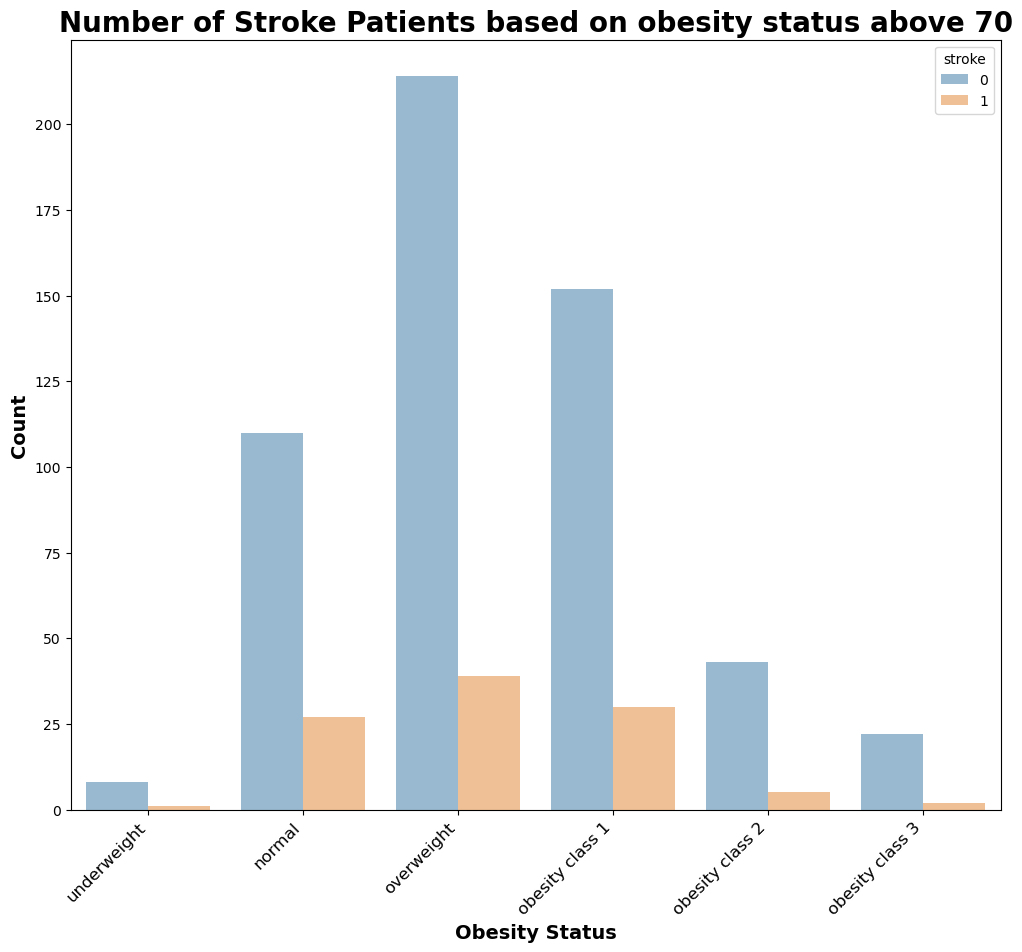

In [152]:
plt.figure(figsize=(12,10))
sns.countplot(data=df[df['age']>70], x='obesity_status', hue='stroke', alpha=0.5)

# Adjust xticks to display the category names
new_labels = ['underweight', 'normal', 'overweight', 'obesity class 1', 'obesity class 2', 'obesity class 3']
plt.xticks(ticks=range(len(new_labels)), labels=new_labels, rotation=45, ha='right',fontsize=12)
plt.xlabel('Obesity Status',fontsize=14, weight='bold')
plt.ylabel('Count',fontsize=14, weight='bold')
plt.title('Number of Stroke Patients based on obesity status above 70',fontsize=20, weight="bold")
plt.show()

Text(0.5, 1.0, 'BMI of Stroke Patients Count')

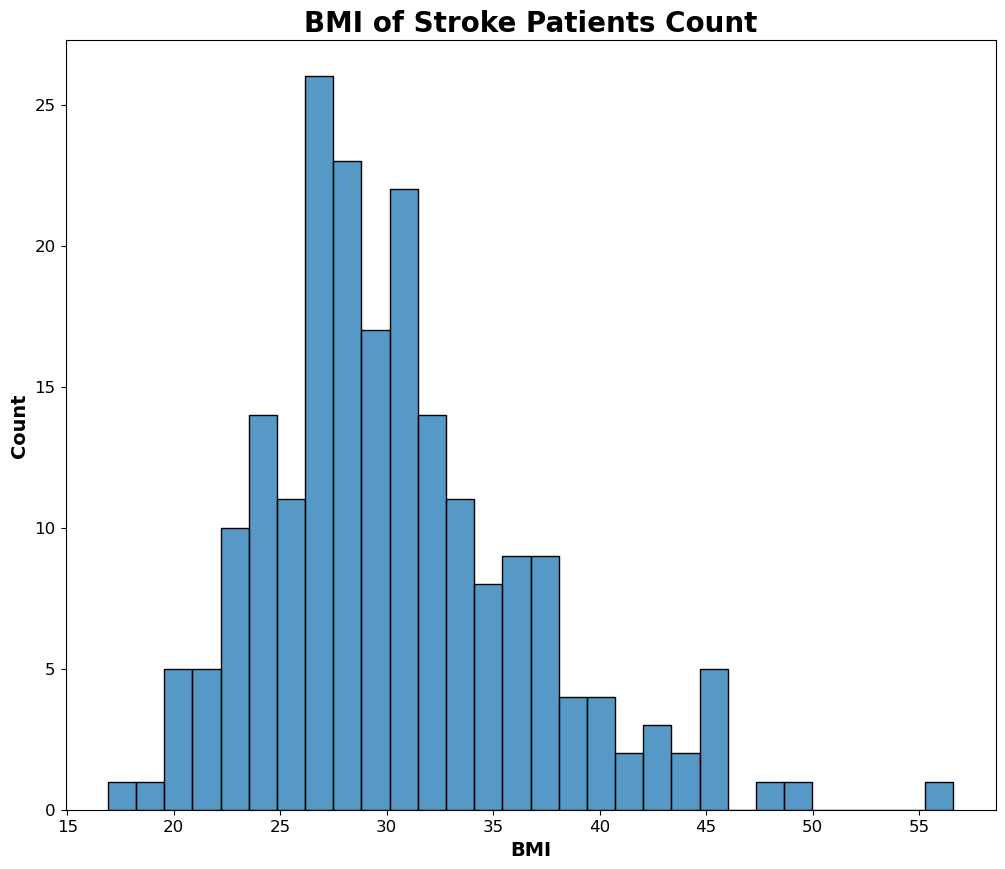

In [153]:
plt.figure(figsize=(12,10))
sns.histplot(data=stroke_df, x='bmi',bins=30)

plt.xlabel('BMI', fontsize=14, weight='bold')
plt.ylabel('Count', fontsize=14, weight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.title('BMI of Stroke Patients Count', fontsize=20, weight="bold")

##### Average BMI for people with stroke is 26-27.

Text(0.5, 1.0, 'Class Distribution')

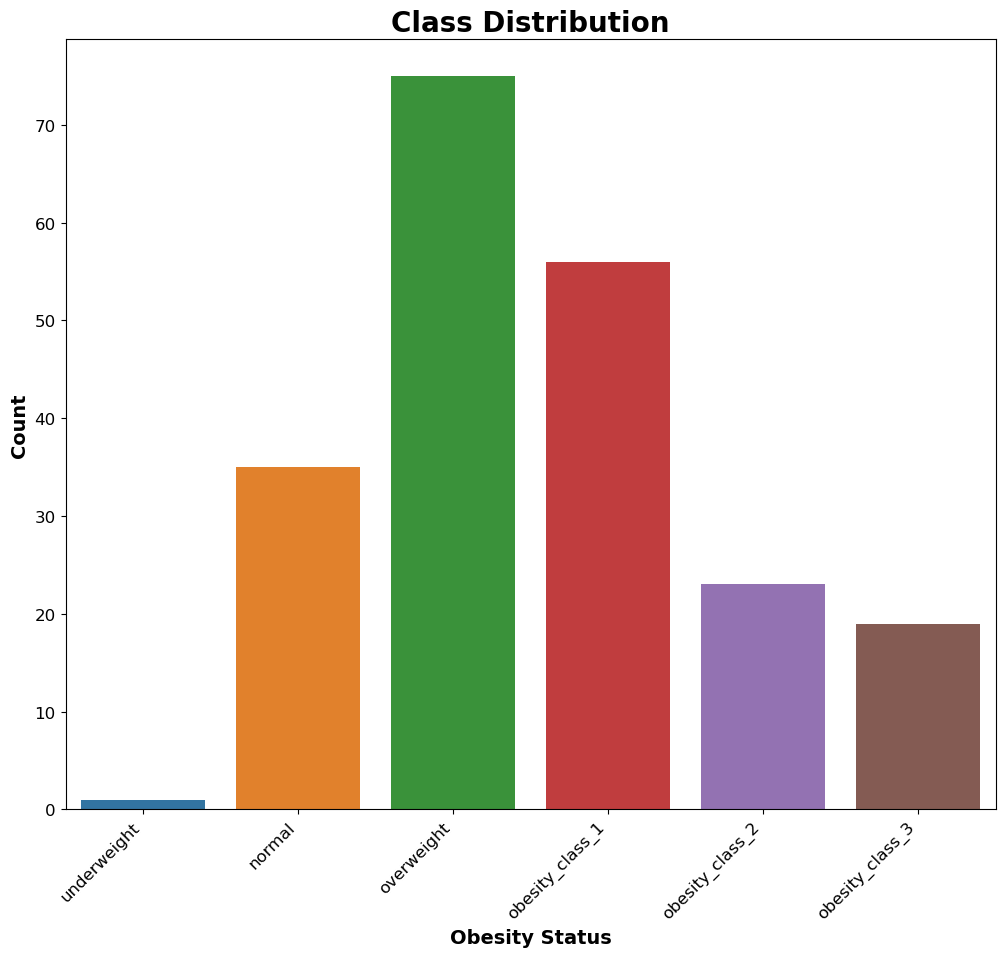

In [154]:
plt.figure(figsize=(12,10))
sns.countplot(x='obesity_status', data=stroke_df)

plt.xlabel('Obesity Status', fontsize=14, weight='bold')
plt.ylabel('Count', fontsize=14, weight='bold')

plt.xticks([0,1,2,3,4,5],['underweight','normal','overweight','obesity_class_1','obesity_class_2','obesity_class_3'], rotation=45, ha='right',fontsize=12)
plt.yticks(fontsize=12)

plt.title('Class Distribution', fontsize=20, weight="bold")

##### People with "overweight" have the higher proportion of stroke.

Text(0.5, 1.0, 'Stroke Patient Average Glucose Level Count')

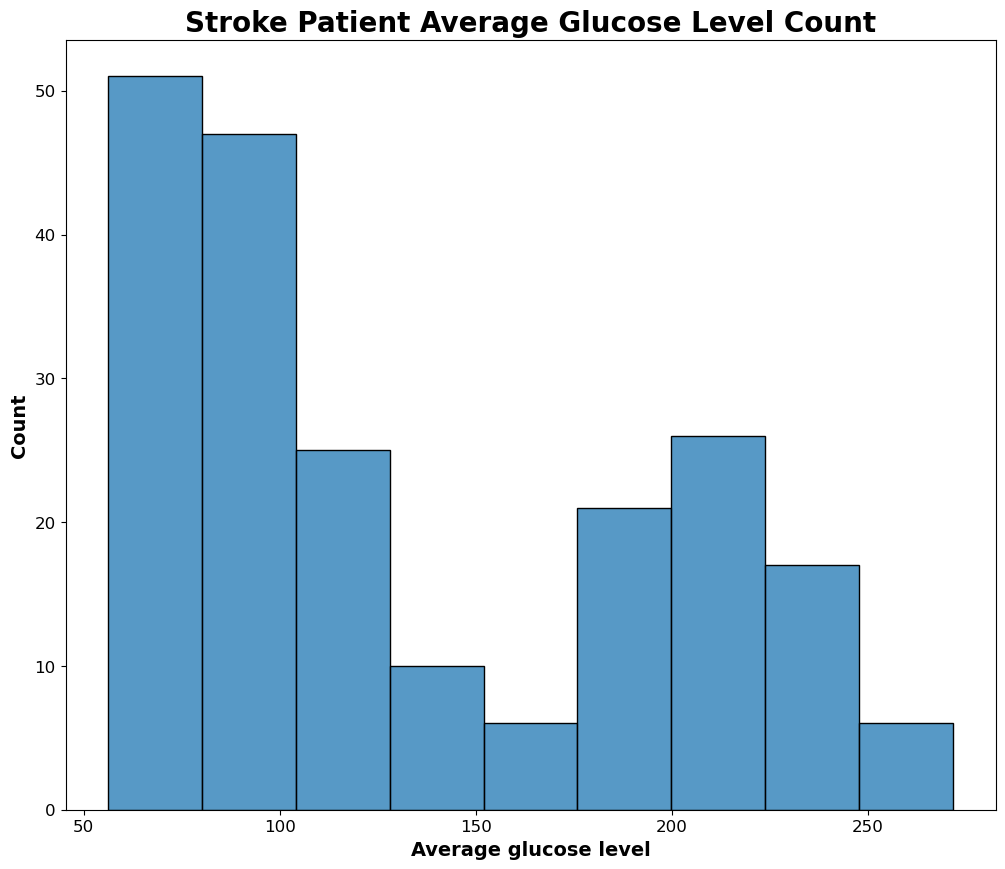

In [155]:
plt.figure(figsize=(12,10))
sns.histplot(data=stroke_df, x='avg_glucose_level')

plt.xlabel('Average glucose level', fontsize=14, weight='bold')
plt.ylabel('Count', fontsize=14, weight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.title('Stroke Patient Average Glucose Level Count', fontsize=20, weight="bold")

##### Surprisingly, the average glucose level is on the lower side.

Text(0.5, 1.0, 'Stroke Patient Hypetension Count')

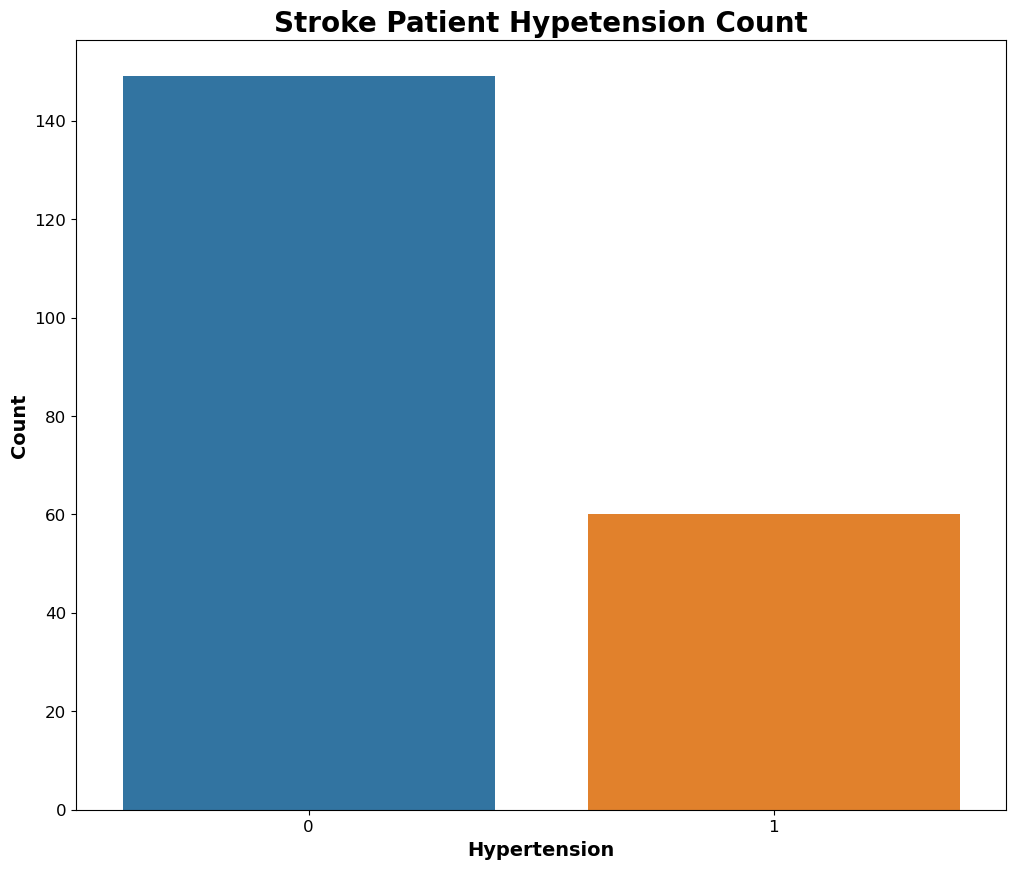

In [156]:
plt.figure(figsize=(12,10))
sns.countplot(x='hypertension', data=stroke_df)

plt.xlabel('Hypertension', fontsize=14, weight='bold')
plt.ylabel('Count', fontsize=14, weight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.title('Stroke Patient Hypetension Count', fontsize=20, weight="bold")

##### In our dataset, a surprisingly high proportion of people who experienced stroke do not have hypertension.

Text(0.5, 1.0, 'Stroke Patient Residence Type Count')

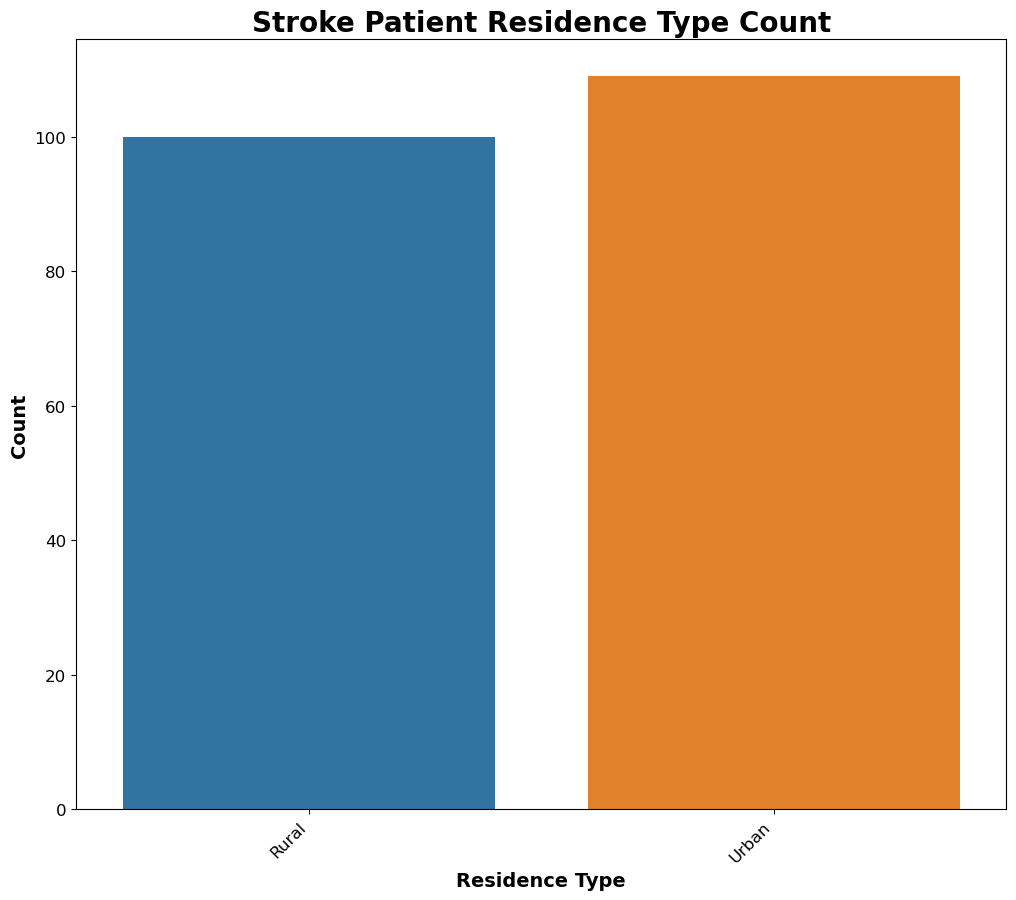

In [157]:
plt.figure(figsize=(12,10))
sns.countplot(x='Residence_type', data=stroke_df)

plt.xlabel('Residence Type', fontsize=14, weight='bold')
plt.ylabel('Count', fontsize=14, weight='bold')

plt.xticks([0,1],['Rural','Urban'],rotation=45, ha='right',fontsize=12)
plt.yticks(fontsize=12)

plt.title('Stroke Patient Residence Type Count', fontsize=20, weight="bold")

##### People live in urban area tends to have higher proportion of stroke.

Text(0.5, 1.0, 'Stroke Patient Heart Disease Count')

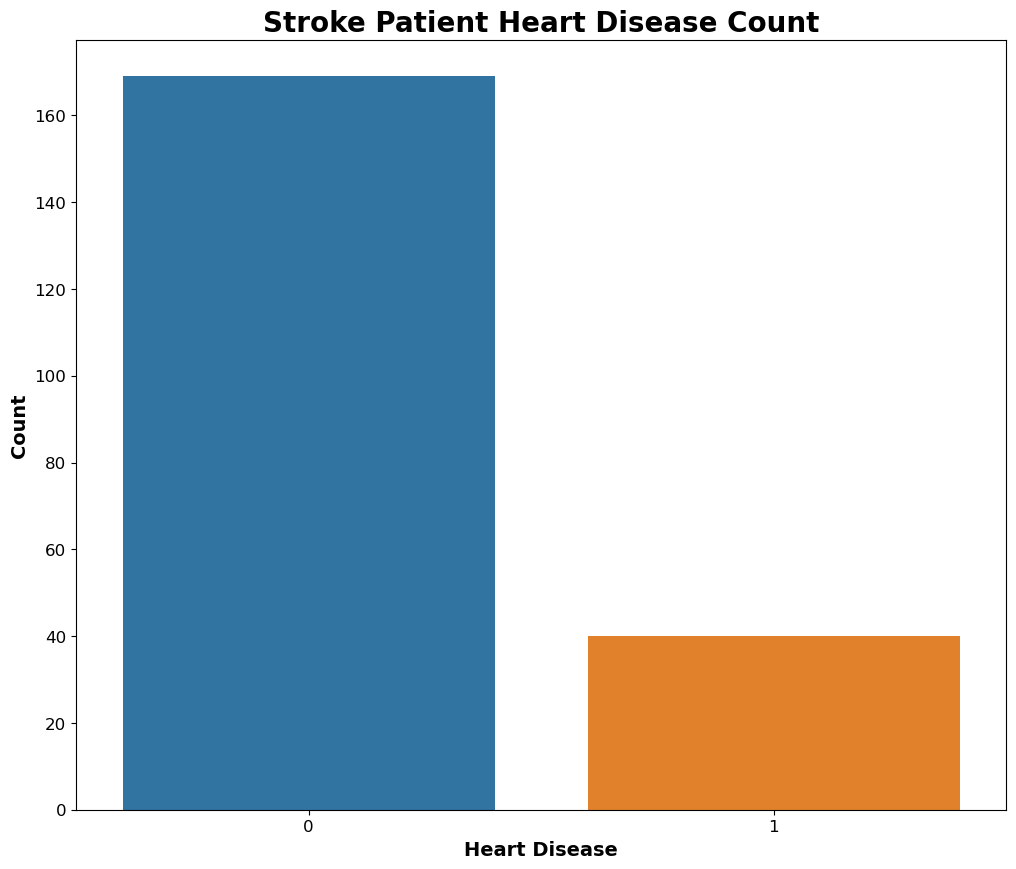

In [158]:
plt.figure(figsize=(12,10))
sns.countplot(x='heart_disease', data=stroke_df)

plt.xlabel('Heart Disease', fontsize=14, weight='bold')
plt.ylabel('Count', fontsize=14, weight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.title('Stroke Patient Heart Disease Count', fontsize=20, weight="bold")

##### A high proportion of people who experienced stroke do not have heart disease.

In [159]:
stroke_df['smoking_status'].value_counts()

smoking_status
never smoked       84
formerly smoked    57
smokes             39
Unknown            29
Name: count, dtype: int64

In [160]:
def recategorize_smoking(status):
    if status == "never smoked":
        return "non_smoker"
    elif status == "Unknown":
        return "non_smoker"
    elif status == "formerly smoked":
        return "former_smoker"
    else:
        return "smoker"

In [161]:
stroke_df['smoking_status'] = stroke_df['smoking_status'].apply(recategorize_smoking)

/var/folders/p4/69_wbmy1275g6vc8jw1vvhf00000gn/T/ipykernel_16061/1402225051.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stroke_df['smoking_status'] = stroke_df['smoking_status'].apply(recategorize_smoking)


Text(0.5, 1.0, 'Stroke Patient Smoking Status Count')

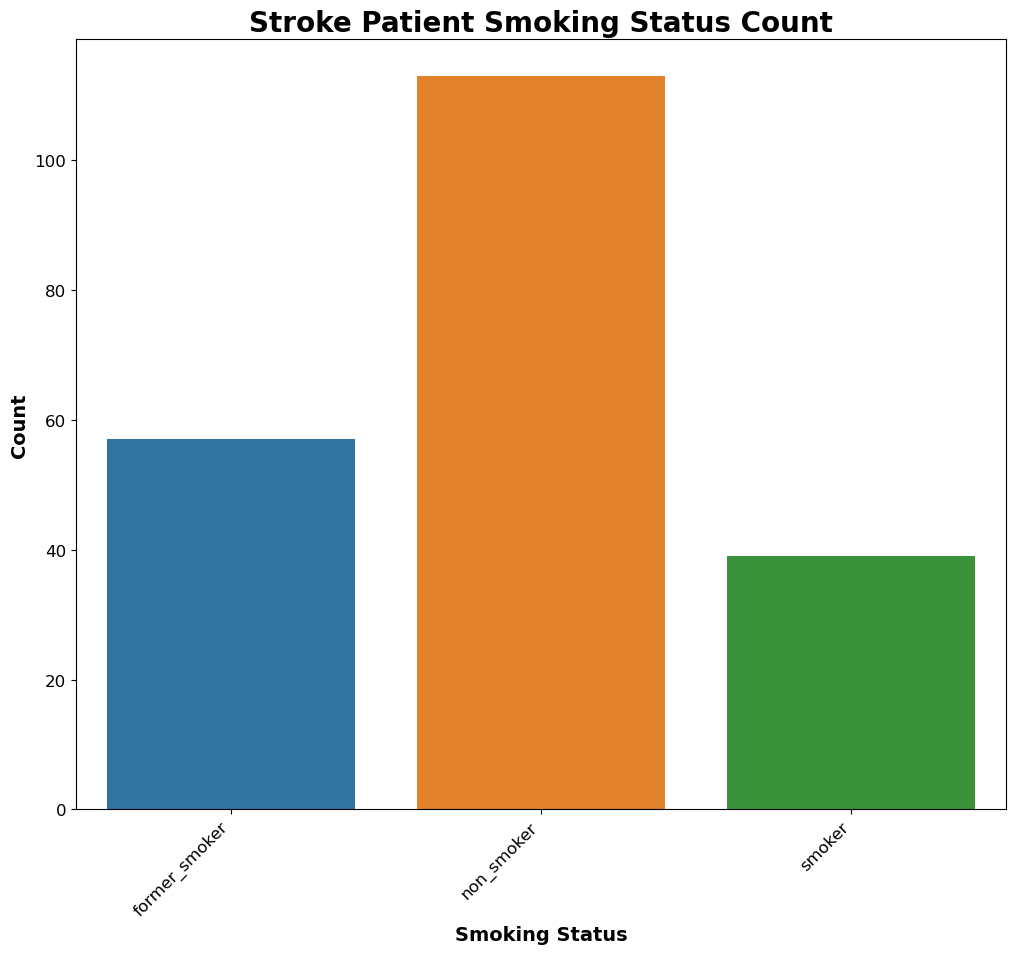

In [162]:
plt.figure(figsize=(12,10))
sns.countplot(x='smoking_status', data=stroke_df)

plt.xlabel('Smoking Status', fontsize=14, weight='bold')
plt.ylabel('Count', fontsize=14, weight='bold')

plt.xticks(rotation=45, ha='right',fontsize=12)
plt.yticks(fontsize=12)

plt.title('Stroke Patient Smoking Status Count', fontsize=20, weight="bold")

##### Non-smokers have a higher proportion in the stroke data.

Text(0.5, 1.0, 'Stroke Patient Diabetes Status Count')

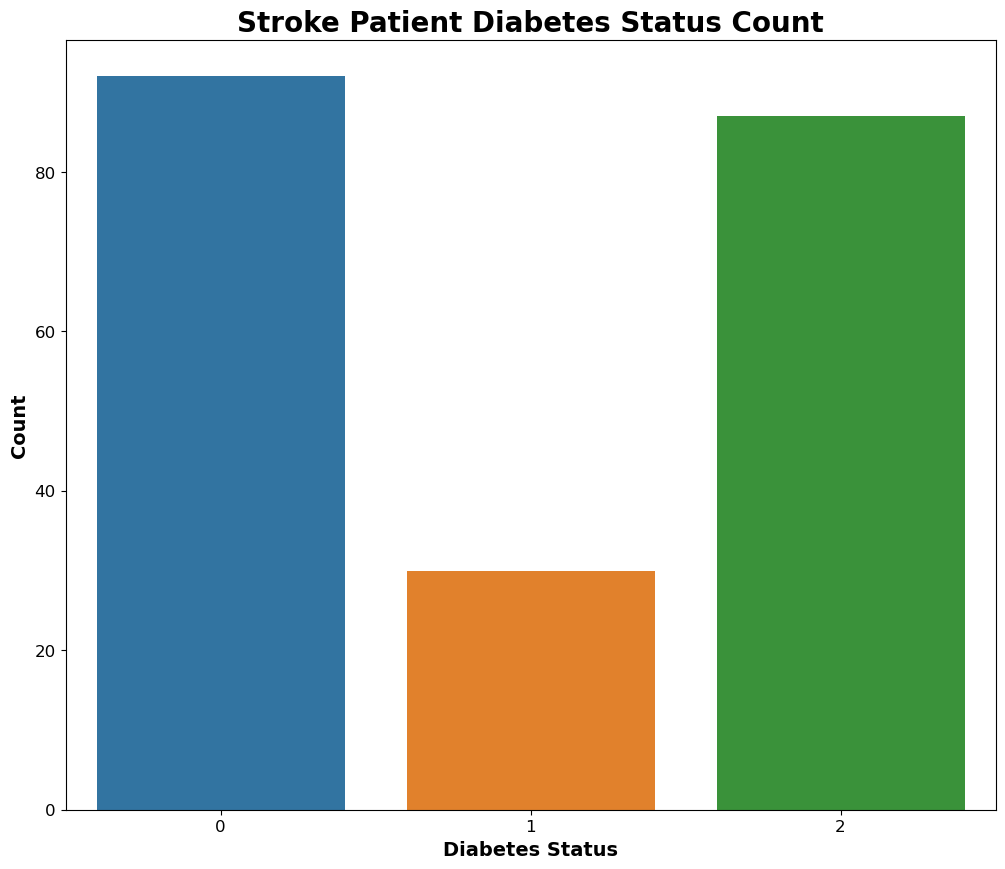

In [163]:
plt.figure(figsize=(12,10))
sns.countplot(x='diabetic_status', data=stroke_df)

plt.xlabel('Diabetes Status', fontsize=14, weight='bold')
plt.ylabel('Count', fontsize=14, weight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.title('Stroke Patient Diabetes Status Count', fontsize=20, weight="bold")

##### Diabetes class 1 (prediabetes) have the lowest proportion of stroke patients.

Text(0.5, 1.0, 'Stroke Patient Employment Type Count')

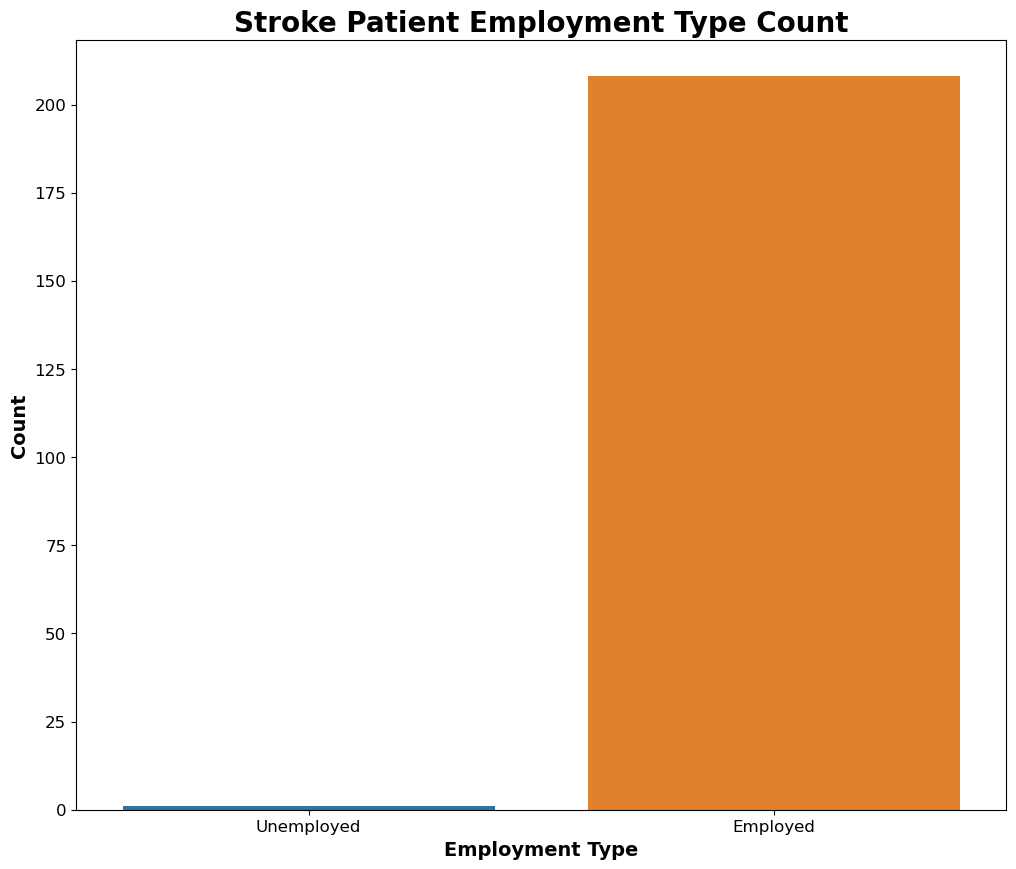

In [164]:
plt.figure(figsize=(12,10))
sns.countplot(x='employment_type', data=stroke_df)

plt.xlabel('Employment Type', fontsize=14, weight='bold')
plt.ylabel('Count', fontsize=14, weight='bold')

plt.xticks([0,1],["Unemployed","Employed"],fontsize=12)
plt.yticks(fontsize=12)

plt.title('Stroke Patient Employment Type Count', fontsize=20, weight="bold")

##### All of the stroke patients are employed.

---
##### We have completed data cleaning and analysis for the stroke dataset. In the next notebook 2.0, we will begin modeling for the obesity classification model.